In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data_path = r'C:\Users\anoushka chatterjee\Desktop\project\data\raw\equipment_data.csv'
df = pd.read_csv(data_path)


In [4]:
print("Data Information:")
print(df.info())
print("\nData Description:")
print(df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8737 non-null   object 
 1   temperature  8737 non-null   float64
 2   pressure     8737 non-null   float64
 3   vibration    8737 non-null   float64
 4   failure      8737 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 341.4+ KB
None

Data Description:
       temperature     pressure    vibration      failure
count  8737.000000  8737.000000  8737.000000  8737.000000
mean     74.989917    30.042958     0.019983     0.291748
std      10.106150     4.971961     0.009896     0.454593
min      36.633445    10.387999    -0.018564     0.000000
25%      68.230049    26.703379     0.013174     0.000000
50%      74.963975    30.064506     0.020019     0.000000
75%      81.789470    33.370720     0.026726     1.000000
max     114.262377    52.39542

In [5]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
             timestamp  temperature   pressure  vibration  failure
0  2023-01-01 00:00:00    79.967142  28.803634   0.027561        0
1  2023-01-01 01:00:00    73.617357  37.390606   0.045873        1
2  2023-01-01 02:00:00    81.476885  22.588016   0.000238        0
3  2023-01-01 03:00:00    90.230299  26.243273   0.017989        1
4  2023-01-01 04:00:00    72.658466  37.600459   0.024123        0


In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
timestamp      0
temperature    0
pressure       0
vibration      0
failure        0
dtype: int64


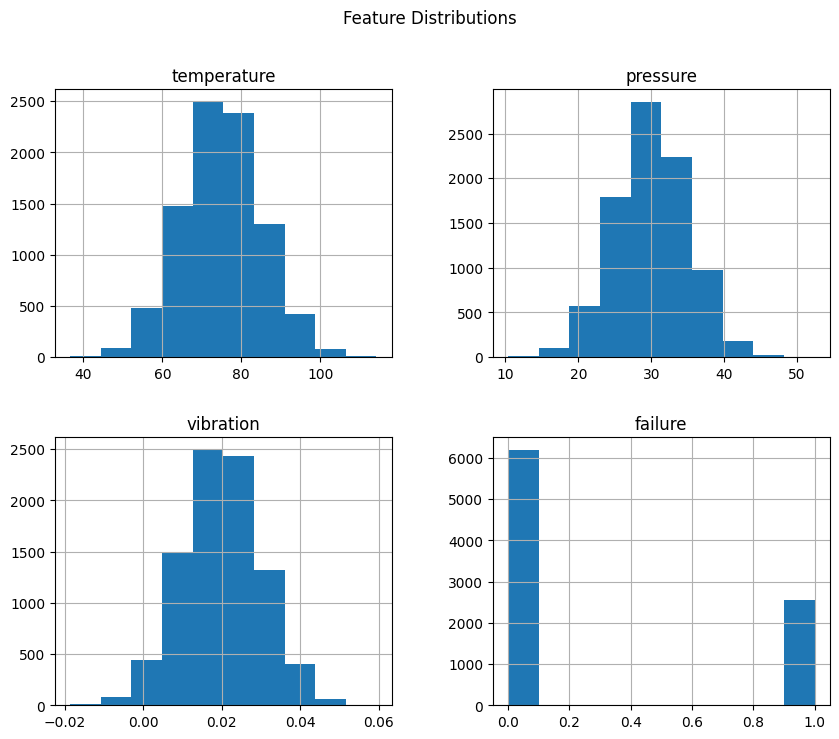

In [7]:
df.hist(figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()

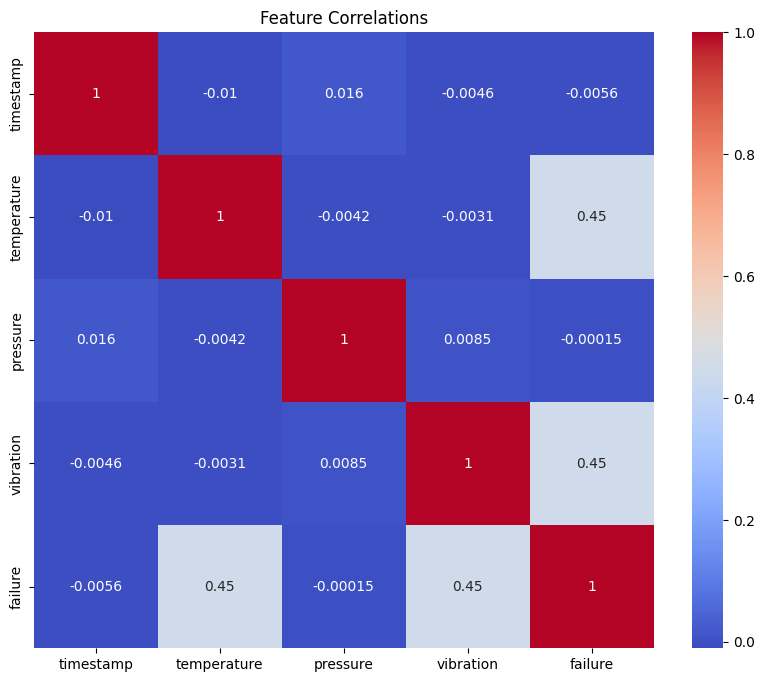

In [10]:
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

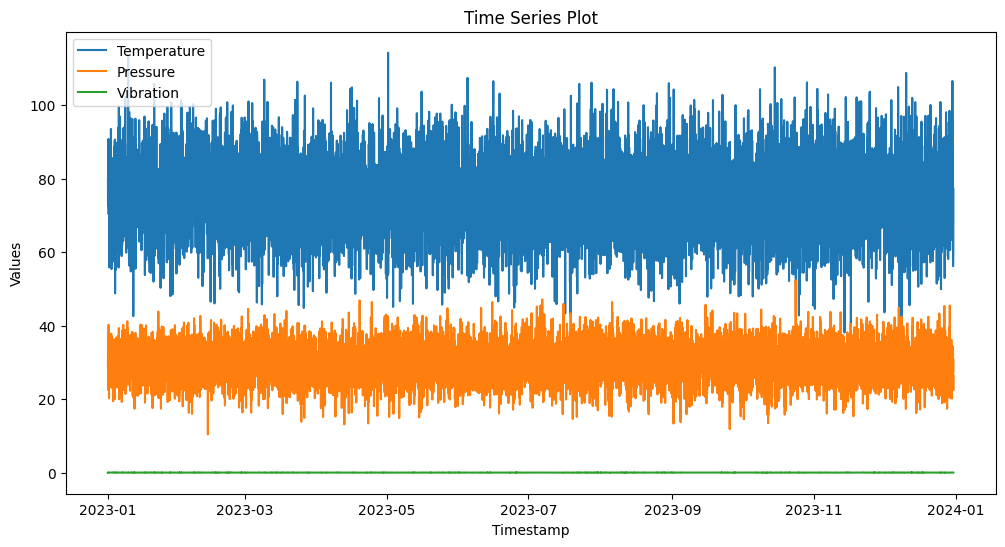

In [9]:
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['temperature'], label='Temperature')
    plt.plot(df['timestamp'], df['pressure'], label='Pressure')
    plt.plot(df['timestamp'], df['vibration'], label='Vibration')
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.title('Time Series Plot')
    plt.legend()
    plt.show()

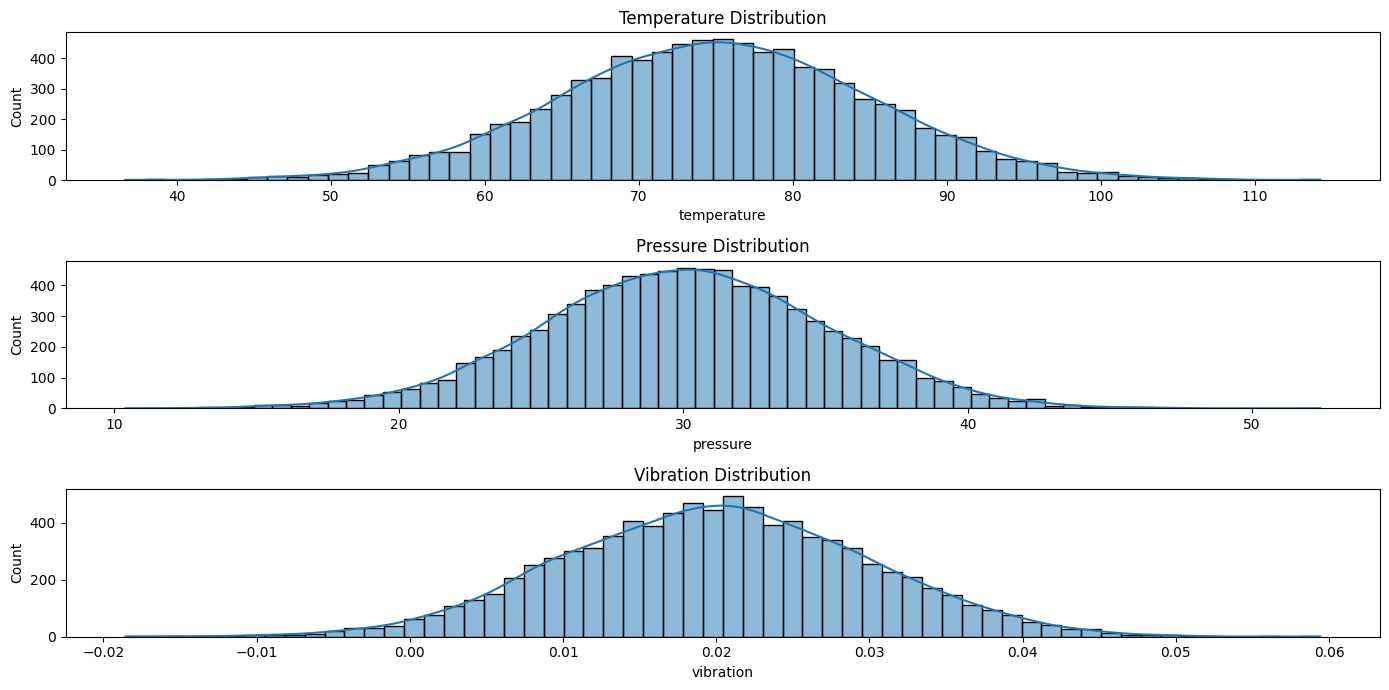

In [33]:
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
sns.histplot(df['temperature'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(3, 1, 2)
sns.histplot(df['pressure'], kde=True)
plt.title('Pressure Distribution')

plt.subplot(3, 1, 3)
sns.histplot(df['vibration'], kde=True)
plt.title('Vibration Distribution')

plt.tight_layout()
plt.show()


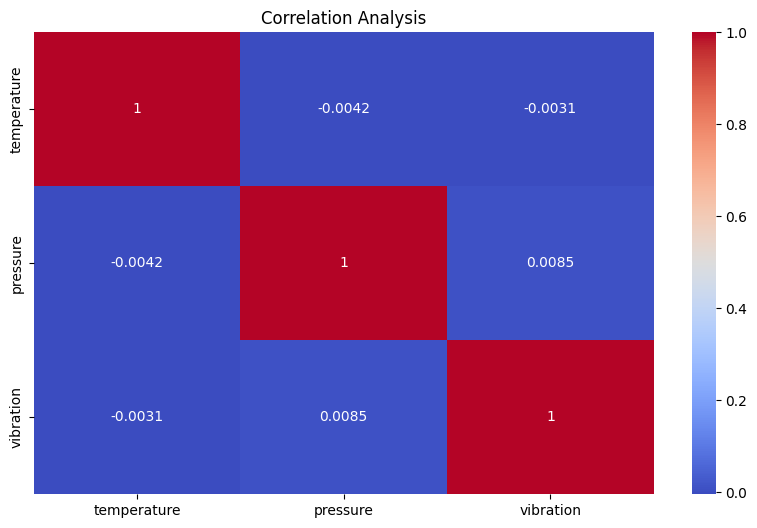

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['temperature', 'pressure', 'vibration']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

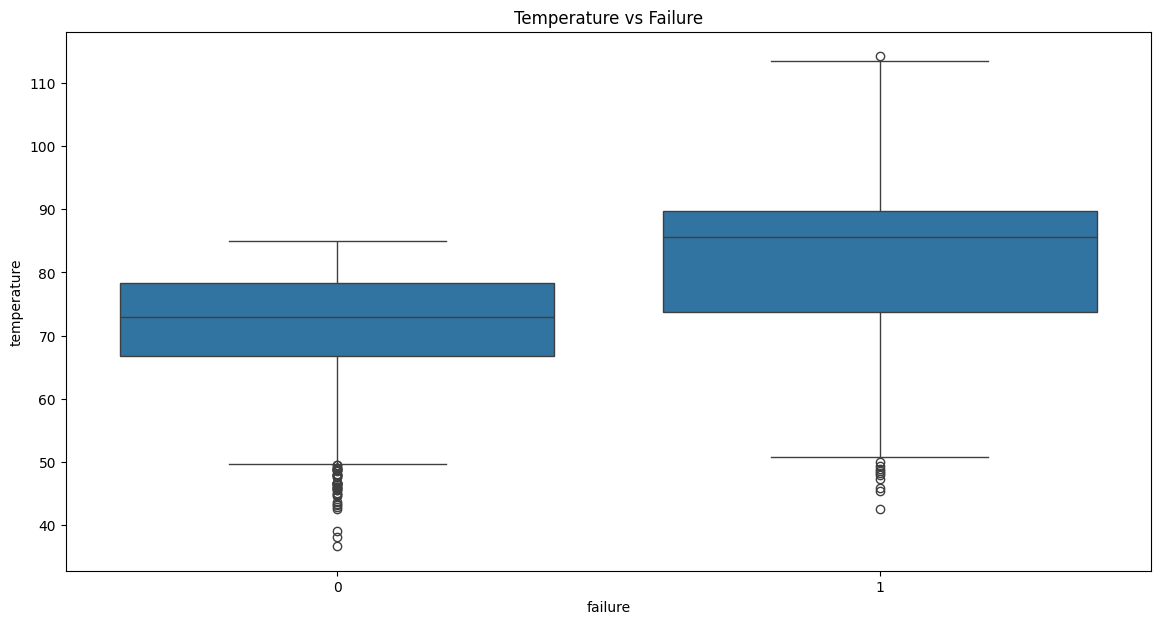

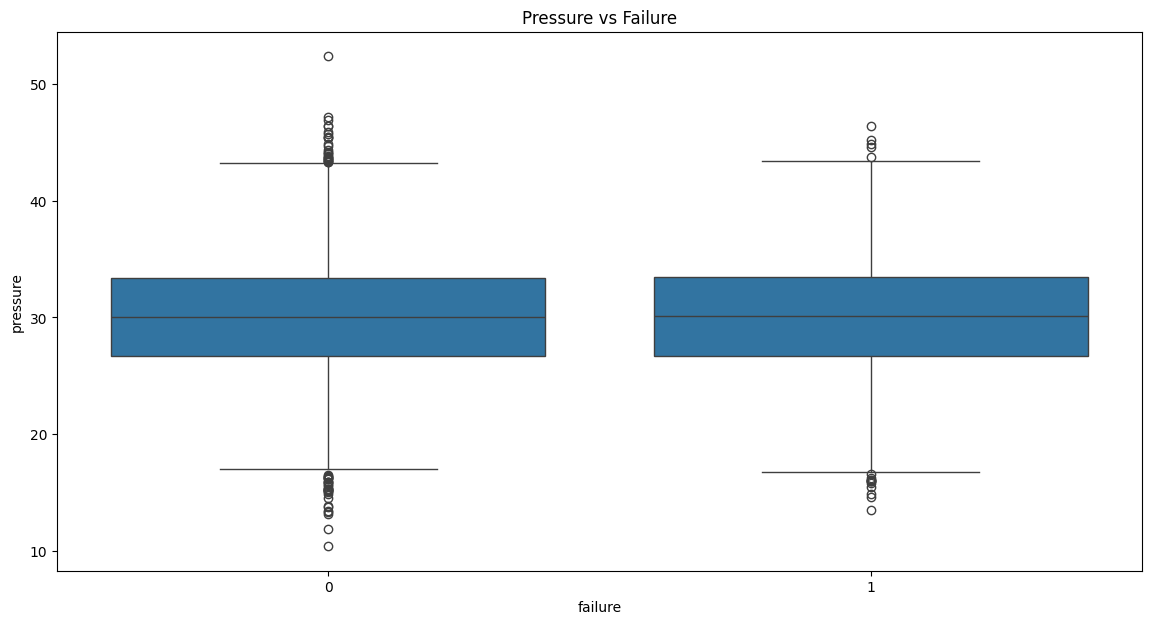

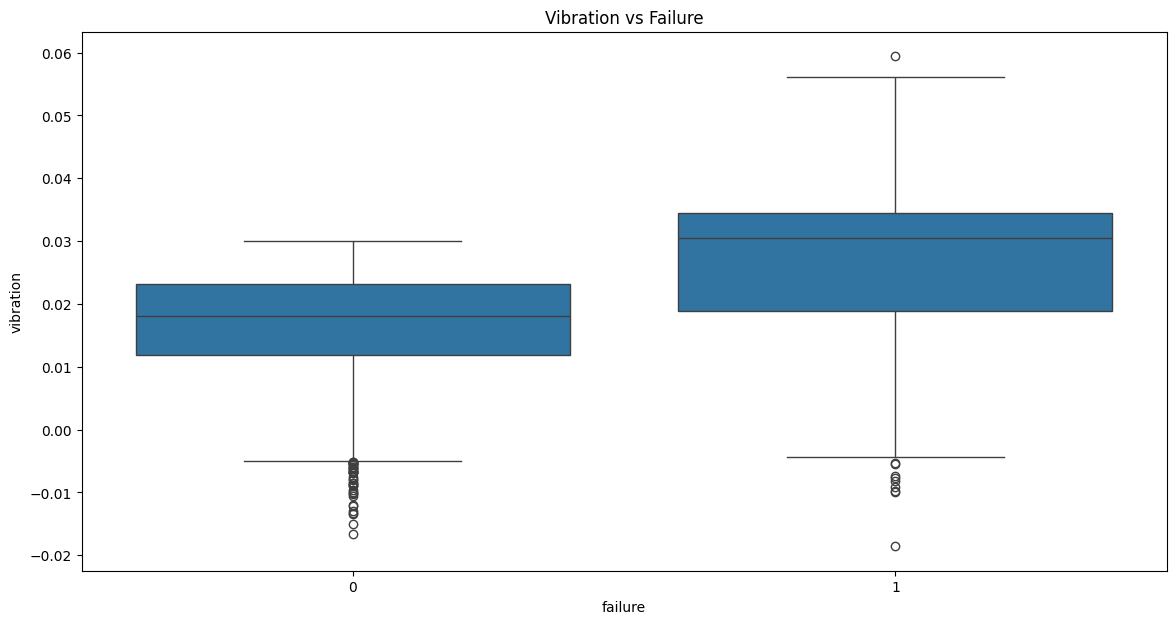

In [35]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='failure', y='temperature', data=df)
plt.title('Temperature vs Failure')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='failure', y='pressure', data=df)
plt.title('Pressure vs Failure')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='failure', y='vibration', data=df)
plt.title('Vibration vs Failure')
plt.show()

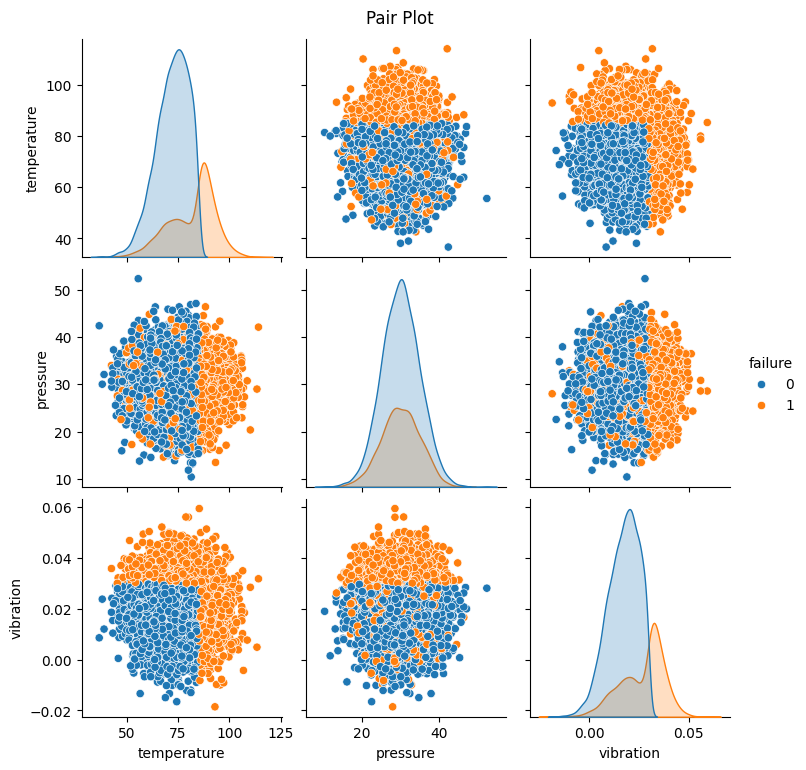

In [36]:
sns.pairplot(df[['temperature', 'pressure', 'vibration', 'failure']], hue='failure')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

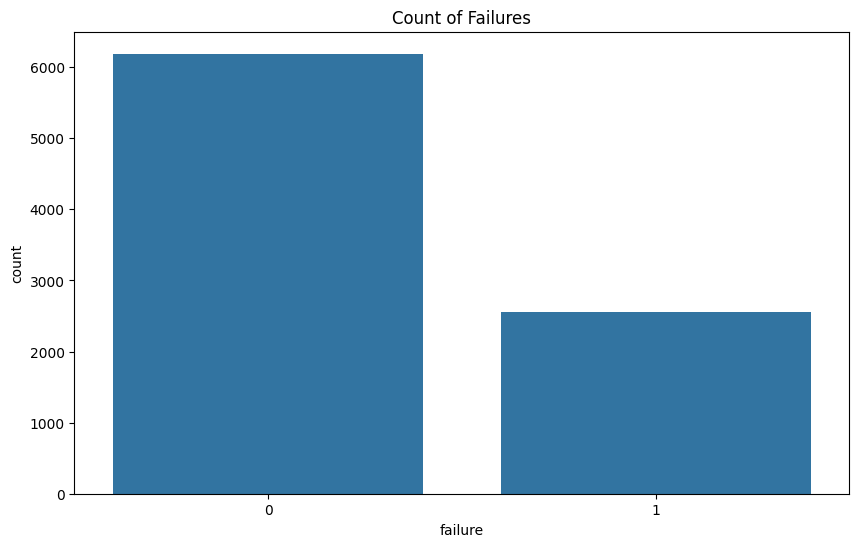

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='failure', data=df)
plt.title('Count of Failures')
plt.show()